Importing Required Libraries

In [51]:
# For Data Manipulation
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Reading the dataset

In [6]:
h_df=pd.read_csv("framingham.csv")
h_df.head(10)   # First 10 records from the dataset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


Now we Analyse The Data

In [7]:
# Shape of the dataset show number of rows and columns respectively 
h_df.shape

(4238, 16)

In [11]:
h_df.keys() # keys used to show which are the columns are present in the dataset

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# A concise summary of the dataset
h_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [55]:
h_df.duplicated().sum() # It shows that there is no Duplicated Values present in the dataset.

0

In [15]:
h_df.describe().round() # used to Generate descriptive statistics summary

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.0,4238.0,4133.0,4238.0,4209.0,4185.0,4238.0,4238.0,4238.0,4188.0,4238.0,4238.0,4219.0,4237.0,3850.0,4238.0
mean,0.0,50.0,2.0,0.0,9.0,0.0,0.0,0.0,0.0,237.0,132.0,83.0,26.0,76.0,82.0,0.0
std,0.0,9.0,1.0,1.0,12.0,0.0,0.0,0.0,0.0,45.0,22.0,12.0,4.0,12.0,24.0,0.0
min,0.0,32.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,84.0,48.0,16.0,44.0,40.0,0.0
25%,0.0,42.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,117.0,75.0,23.0,68.0,71.0,0.0
50%,0.0,49.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,234.0,128.0,82.0,25.0,75.0,78.0,0.0
75%,1.0,56.0,3.0,1.0,20.0,0.0,0.0,1.0,0.0,263.0,144.0,90.0,28.0,83.0,87.0,0.0
max,1.0,70.0,4.0,1.0,70.0,1.0,1.0,1.0,1.0,696.0,295.0,142.0,57.0,143.0,394.0,1.0


In [18]:
h_df.isnull().sum() # checking for missing Values

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Removing NaN or NULL vales from the data

In [20]:
h_df.dropna(axis = 0, inplace = True) 
print(h_df.shape)

(3656, 16)


Correlation Matrix

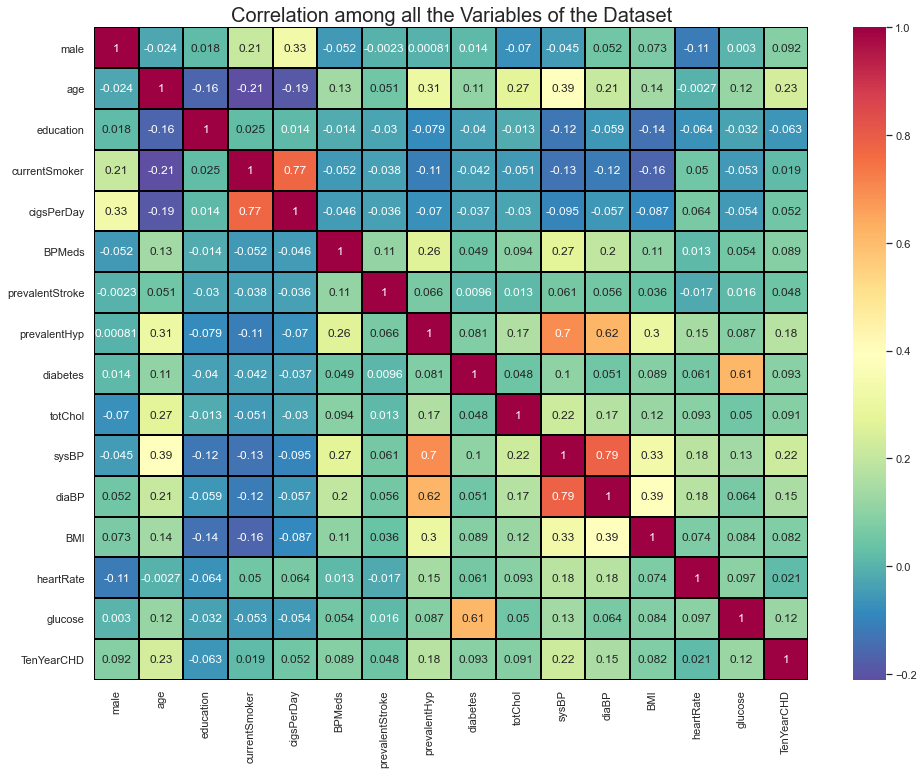

In [80]:

plt.figure(figsize = (16, 12)) 
sns.heatmap(h_df.corr(), cmap='Spectral_r',annot=True, linecolor='Black', linewidths=1.0)
plt.title("Correlation among all the Variables of the Dataset", size=20)
plt.show()

C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abhay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

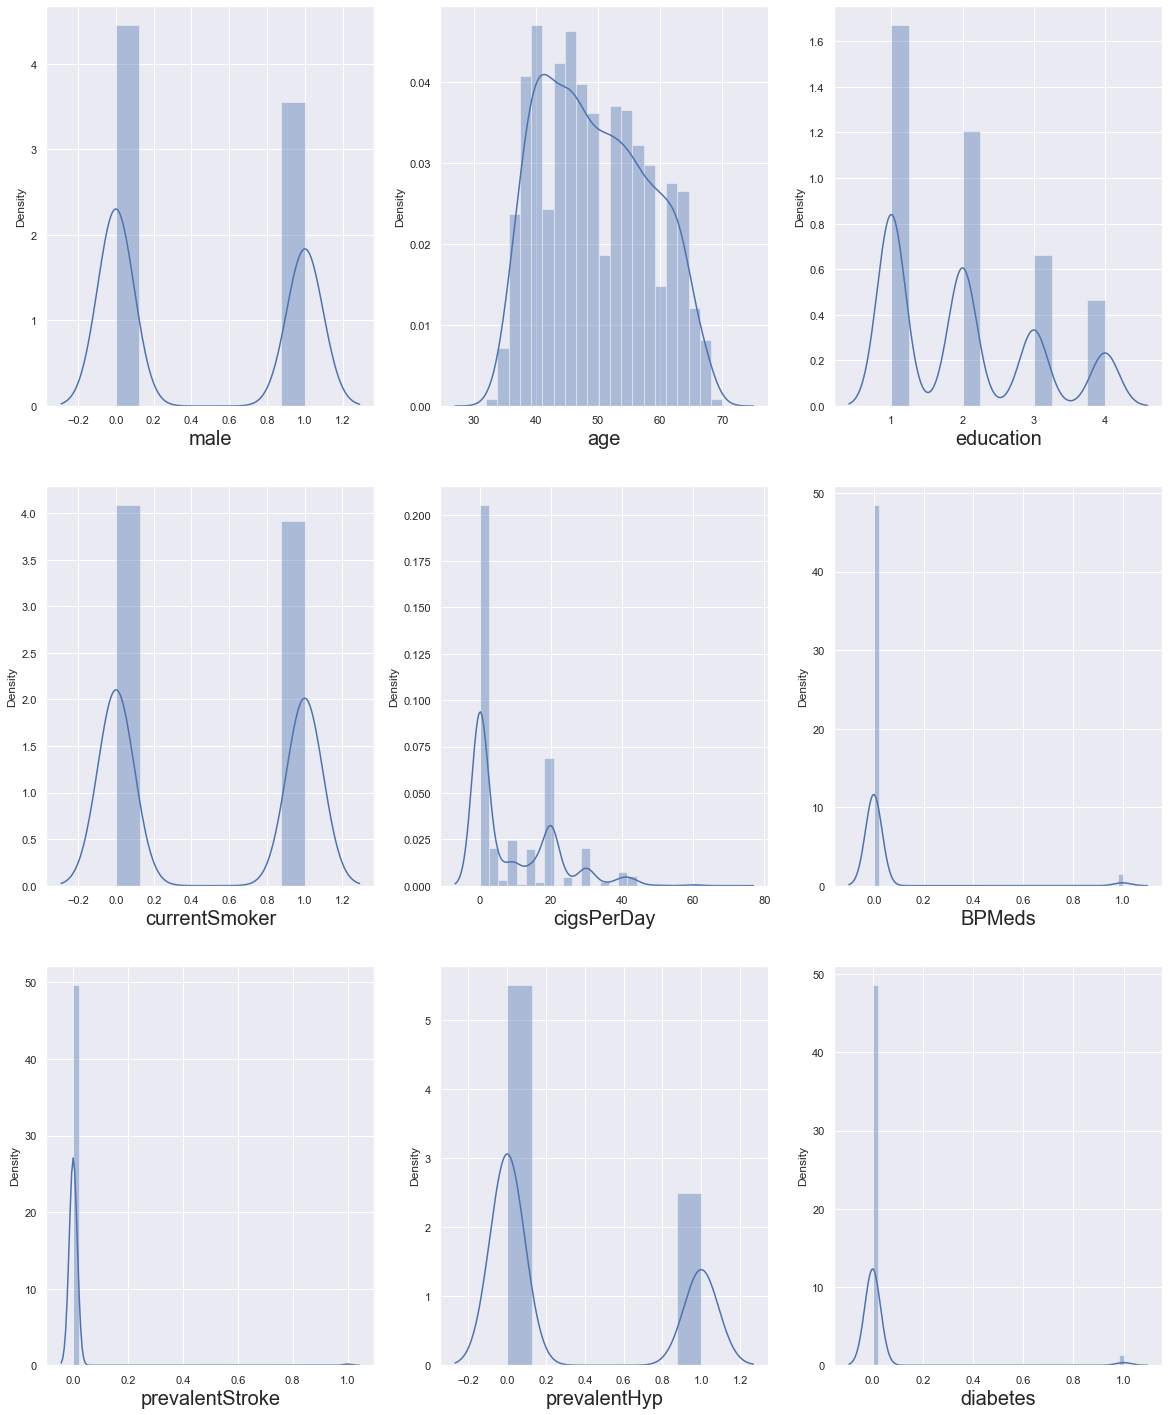

In [74]:
# how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in h_df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(h_df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

Pairplot

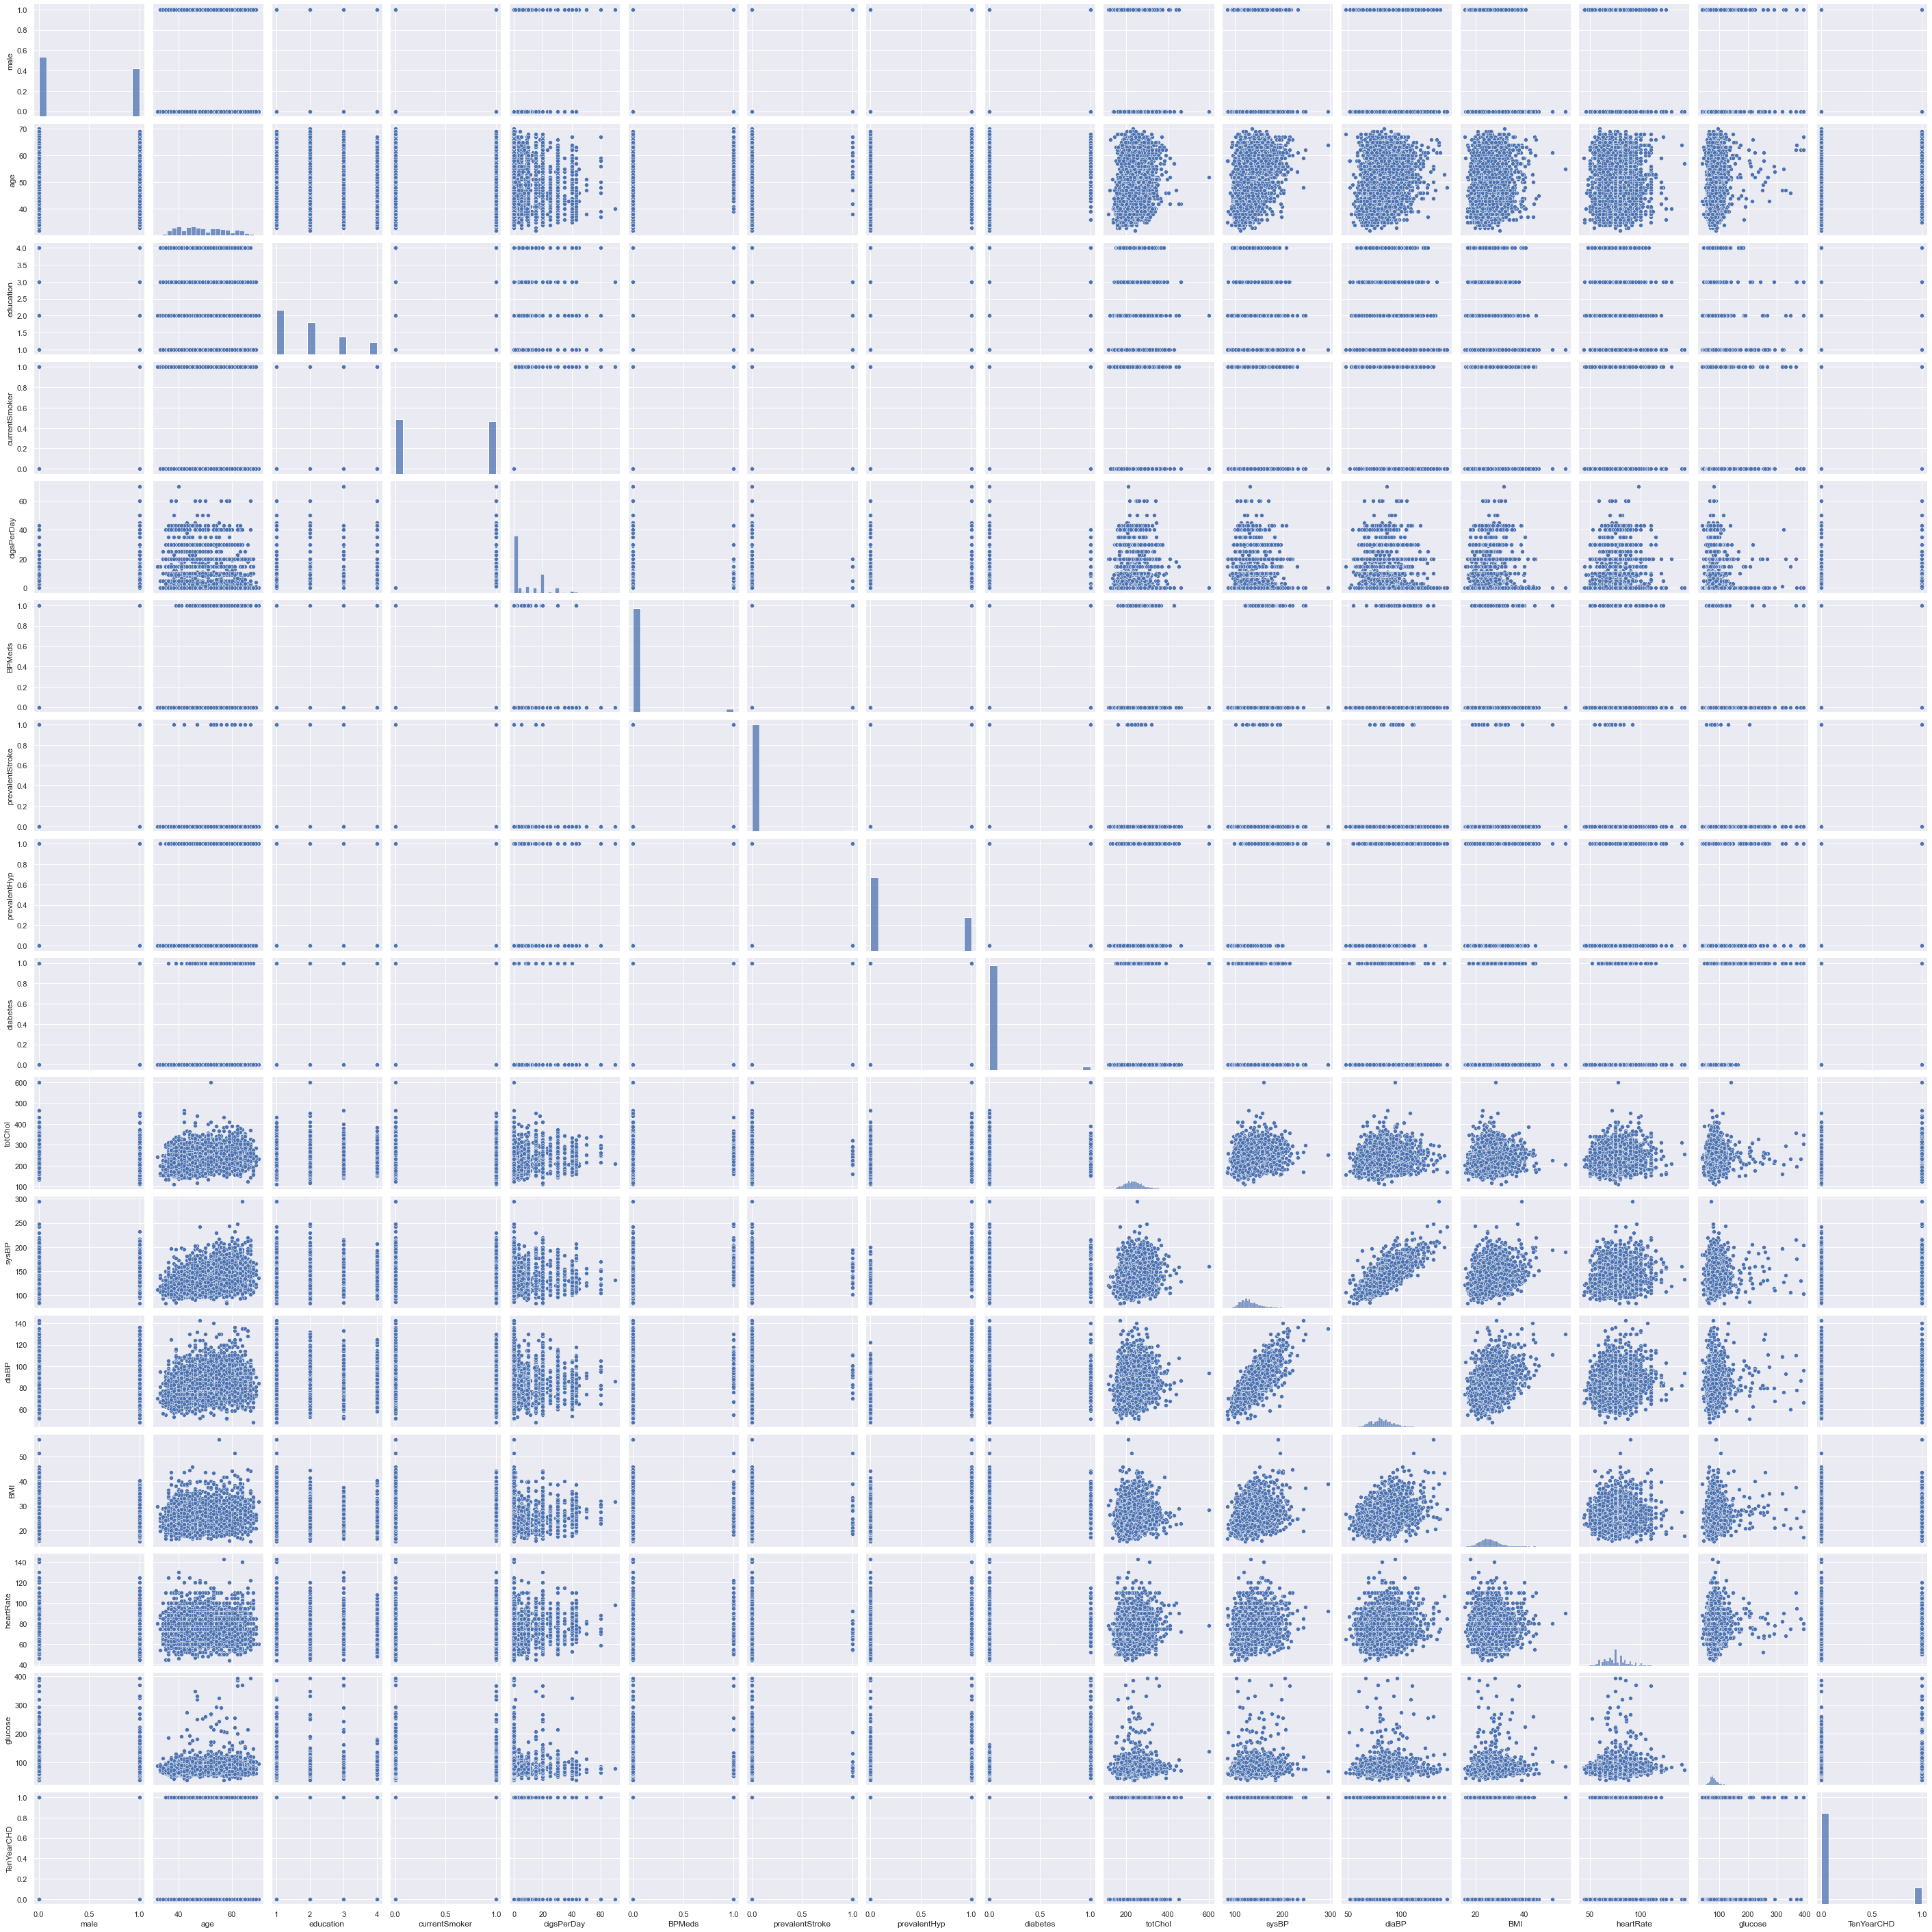

In [40]:
sns.pairplot(h_df)
plt.show()

Countplot of people based on their sex whether they are Current Smoker or not

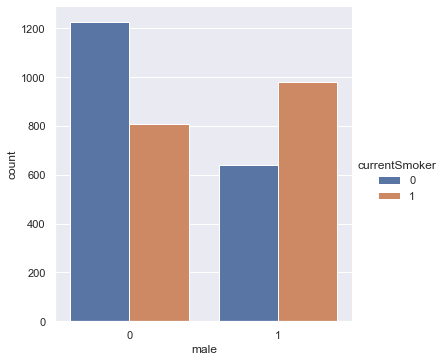

In [42]:
sns.catplot(data=h_df, kind='count', x='male',hue='currentSmoker')
plt.show()

Separating the data into feature and target data.

In [65]:
x = h_df.iloc[:,0:15]
y = h_df.iloc[:,15:16]
x.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [66]:
y.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


Applying Logistic Regression

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=355)
logreg = LogisticRegression()

Training the data

In [76]:
logreg.fit(X_train, y_train)

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\abhay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Testing the Data

In [77]:
y_pred = logreg.predict(X_test)

Predicting the score

In [78]:
score = logreg.score(X_test, y_test)
print("Prediction score is:",score) 

Prediction score is: 0.8522975929978118
